# Erste Datenanalyse Codon-Daten

In [42]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt

## Fasta-Datei einlesen

In [29]:
df = pd.DataFrame(columns=['id', 'description', 'species', 'organism', 'codon_sequence', 'translation'])
def add_record_to_df(record, species, organism):
    global df
    df.loc[len(df.index)] = [record.id, record.description, species, organism, str(record.seq), str(record.seq.translate())]

In [30]:
def read_fasta(fasta_file_path, species="K-12 substr. MG1655", organism="Escherichia coli"):
    with open(fasta_file_path) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            add_record_to_df(record, species, organism)

In [46]:
%%time
df = pd.DataFrame(columns=['id', 'description', 'species', 'organism', 'codon_sequence', 'translation'])
read_fasta("../data/E.Coli/GCA_000005845.2/cds_from_genomic.fna")

CPU times: total: 4.69 s
Wall time: 4.7 s


In [32]:
df

,id,description,species,organism,codon_sequence,translation
0,lcl|U00096.3_cds_AAC73112.1_1,lcl|U00096.3_cds_AAC73112.1_1 [gene=thrL] [loc...,K-12 substr. MG1655,Escherichia coli,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,MKRISTTITTTITITTGNGAG*
1,lcl|U00096.3_cds_AAC73113.1_2,lcl|U00096.3_cds_AAC73113.1_2 [gene=thrA] [loc...,K-12 substr. MG1655,Escherichia coli,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...
2,lcl|U00096.3_cds_AAC73114.1_3,lcl|U00096.3_cds_AAC73114.1_3 [gene=thrB] [loc...,K-12 substr. MG1655,Escherichia coli,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...
3,lcl|U00096.3_cds_AAC73115.1_4,lcl|U00096.3_cds_AAC73115.1_4 [gene=thrC] [loc...,K-12 substr. MG1655,Escherichia coli,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...
4,lcl|U00096.3_cds_AAC73116.1_5,lcl|U00096.3_cds_AAC73116.1_5 [gene=yaaX] [loc...,K-12 substr. MG1655,Escherichia coli,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...
...,...,...,...,...,...,...
4310,lcl|U00096.3_cds_AAC77353.1_4311,lcl|U00096.3_cds_AAC77353.1_4311 [gene=creD] [...,K-12 substr. MG1655,Escherichia coli,ATGTTGAAATCCCCCCTGTTCTGGAAAATGACTAGCCTGTTTGGTG...,MLKSPLFWKMTSLFGAVLLLLIPIMLIRQVIVERADYRSDVEDAIR...
4311,lcl|U00096.3_cds_AAC77354.1_4312,lcl|U00096.3_cds_AAC77354.1_4312 [gene=arcA] [...,K-12 substr. MG1655,Escherichia coli,ATGCAGACCCCGCACATTCTTATCGTTGAAGACGAGTTGGTAACAC...,MQTPHILIVEDELVTRNTLKSIFEAEGYDVFEATDGAEMHQILSEY...
4312,lcl|U00096.3_cds_AAC77355.1_4313,lcl|U00096.3_cds_AAC77355.1_4313 [gene=yjjY] [...,K-12 substr. MG1655,Escherichia coli,ATGACTAAAGTACGTAATTGCGTTCTTGATGCACTTTCCATCAACG...,MTKVRNCVLDALSINVNNIISLVVGTFPQDPTVSKTAVILTILTAT*
4313,lcl|U00096.3_cds_UMR55121.1_4314,lcl|U00096.3_cds_UMR55121.1_4314 [gene=ytjE] [...,K-12 substr. MG1655,Escherichia coli,TTGTCGAGATTTATTTTTTATAAAATTATCCTAAGTAAACAGAAGG...,LSRFIFYKIILSKQKDM*


## Datenanalyse

### Länge der Aminosäuresequenzen

In [41]:
# Kürzeste Sequenz
print("Kürzeste Sequenz: ", df['translation'].apply(len).min())

# Längste Sequenz
print("Längste Sequenz: ", df['translation'].apply(len).max())

# Durchschnittliche Länge
print("Durchschnittliche Länge: ", df['translation'].apply(len).mean())

# Median
print("Median: ", df['translation'].apply(len).median())

Kürzeste Sequenz:  9
Längste Sequenz:  2359
Durchschnittliche Länge:  310.9983777520278
Median:  275.0


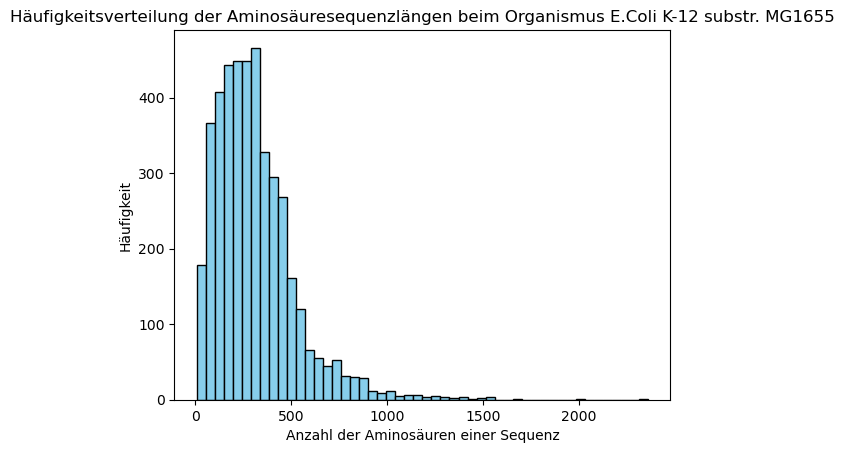

In [39]:
sequence_lengths = df['translation'].apply(len)

plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Anzahl der Aminosäuren einer Sequenz')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeitsverteilung der Aminosäuresequenzlängen beim Organismus E.Coli K-12 substr. MG1655')

plt.show()

### Häufigkeit der Codons -> Codon Usage Frequency

In [47]:
def get_codon_frequency_for_row(row):
    codon_frequency = {}

    sequence = row['codon_sequence']
    if len(sequence) % 3 != 0:
        print(f"Sequence length is not a multiple of 3")
        return {}
    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]

    for codon in codons:
        if codon in codon_frequency:
            codon_frequency[codon] += 1
        else:
            codon_frequency[codon] = 1

    return codon_frequency

In [48]:
df['codon_frequency'] = df.apply(lambda row: get_codon_frequency_for_row(row), axis=1)

In [50]:
df.head()

,id,description,species,organism,codon_sequence,translation,codon_frequency
0,lcl|U00096.3_cds_AAC73112.1_1,lcl|U00096.3_cds_AAC73112.1_1 [gene=thrL] [loc...,K-12 substr. MG1655,Escherichia coli,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,MKRISTTITTTITITTGNGAG*,"{'ATG': 1, 'AAA': 1, 'CGC': 1, 'ATT': 3, 'AGC'..."
1,lcl|U00096.3_cds_AAC73113.1_2,lcl|U00096.3_cds_AAC73113.1_2 [gene=thrA] [loc...,K-12 substr. MG1655,Escherichia coli,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,"{'ATG': 23, 'CGA': 3, 'GTG': 27, 'TTG': 13, 'A..."
2,lcl|U00096.3_cds_AAC73114.1_3,lcl|U00096.3_cds_AAC73114.1_3 [gene=thrB] [loc...,K-12 substr. MG1655,Escherichia coli,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,"{'ATG': 10, 'GTT': 8, 'AAA': 3, 'TAT': 5, 'GCC..."
3,lcl|U00096.3_cds_AAC73115.1_4,lcl|U00096.3_cds_AAC73115.1_4 [gene=thrC] [loc...,K-12 substr. MG1655,Escherichia coli,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,"{'ATG': 8, 'AAA': 17, 'CTC': 6, 'TAC': 5, 'AAT..."
4,lcl|U00096.3_cds_AAC73116.1_5,lcl|U00096.3_cds_AAC73116.1_5 [gene=yaaX] [loc...,K-12 substr. MG1655,Escherichia coli,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,"{'GTG': 1, 'AAA': 5, 'AAG': 2, 'ATG': 2, 'CAA'..."


In [51]:
def get_total_codon_frequency(df):
    total_codon_frequency = {}
    for index, row in df.iterrows():
        codon_frequency = row['codon_frequency']
        for codon, frequency in codon_frequency.items():
            if codon in total_codon_frequency:
                total_codon_frequency[codon] += frequency
            else:
                total_codon_frequency[codon] = frequency
    return total_codon_frequency

In [54]:
codon_frequency = get_total_codon_frequency(df)
codon_frequency

{'ATG': 37390,
 'AAA': 45199,
 'CGC': 29647,
 'ATT': 40911,
 'AGC': 21578,
 'ACC': 31532,
 'ATC': 33903,
 'ACA': 9276,
 'GGT': 33326,
 'AAC': 29045,
 'GCG': 45507,
 'GGC': 40011,
 'TGA': 1251,
 'CGA': 4682,
 'GTG': 35330,
 'TTG': 18301,
 'AAG': 13726,
 'TTC': 22229,
 'TCA': 9456,
 'GCA': 27067,
 'AAT': 23488,
 'GAA': 53328,
 'CGT': 28337,
 'TTT': 29841,
 'CTG': 71305,
 'GTT': 24604,
 'GCC': 34416,
 'GAT': 43044,
 'AGG': 1458,
 'CAG': 38834,
 'GGG': 14722,
 'GTC': 20535,
 'CTC': 14952,
 'TCT': 11304,
 'CCC': 7292,
 'CAC': 13029,
 'GCT': 20487,
 'TTA': 18505,
 'CTT': 14728,
 'ACG': 19321,
 'GGA': 10492,
 'CCG': 31344,
 'CAA': 20628,
 'ACT': 11930,
 'ATA': 5592,
 'CAT': 17227,
 'AGT': 11643,
 'TGC': 8651,
 'GAG': 23896,
 'TCG': 11948,
 'GTA': 14643,
 'TAC': 16386,
 'TCC': 11560,
 'GAC': 25721,
 'TGT': 6865,
 'TGG': 20395,
 'TAT': 21526,
 'CCT': 9308,
 'CCA': 11274,
 'CGG': 7131,
 'CTA': 5203,
 'TAA': 2763,
 'AGA': 2629,
 'TAG': 306}

In [65]:
len(codon_frequency.keys())

64

In [66]:
translation_dict = {}
for codon in codon_frequency:
    translation = str(Seq(codon).translate())
    if translation in translation_dict:
        translation_dict[translation].append(codon)
    else:
        translation_dict[translation] = [codon]
translation_dict

{'M': ['ATG'],
 'K': ['AAA', 'AAG'],
 'R': ['CGC', 'CGA', 'CGT', 'AGG', 'CGG', 'AGA'],
 'I': ['ATT', 'ATC', 'ATA'],
 'S': ['AGC', 'TCA', 'TCT', 'AGT', 'TCG', 'TCC'],
 'T': ['ACC', 'ACA', 'ACG', 'ACT'],
 'G': ['GGT', 'GGC', 'GGG', 'GGA'],
 'N': ['AAC', 'AAT'],
 'A': ['GCG', 'GCA', 'GCC', 'GCT'],
 '*': ['TGA', 'TAA', 'TAG'],
 'V': ['GTG', 'GTT', 'GTC', 'GTA'],
 'L': ['TTG', 'CTG', 'CTC', 'TTA', 'CTT', 'CTA'],
 'F': ['TTC', 'TTT'],
 'E': ['GAA', 'GAG'],
 'D': ['GAT', 'GAC'],
 'Q': ['CAG', 'CAA'],
 'P': ['CCC', 'CCG', 'CCT', 'CCA'],
 'H': ['CAC', 'CAT'],
 'C': ['TGC', 'TGT'],
 'Y': ['TAC', 'TAT'],
 'W': ['TGG']}

In [75]:
def calculate_codon_usage_frequency(codon_frequency):
    codon_usage_frequency = {amino_acid: {codon:-1 for codon in translation_dict[amino_acid]} for amino_acid in translation_dict.keys()}
    for amino_acid, codon_dict in codon_usage_frequency.items():
        amino_acid_frequency = 0
        for codon in codon_dict:
            if codon in codon_frequency:
                amino_acid_frequency += codon_frequency[codon]
            else:
                codon_frequency[codon] = 0
        for codon in codon_dict:
            codon_usage_frequency[amino_acid][codon] = round(codon_frequency[codon] / amino_acid_frequency, 2)
    return codon_usage_frequency


In [76]:
codon_usage_frequency = calculate_codon_usage_frequency(codon_frequency)

In [77]:
codon_usage_frequency

{'M': {'ATG': 1.0},
 'K': {'AAA': 0.77, 'AAG': 0.23},
 'R': {'CGC': 0.4,
  'CGA': 0.06,
  'CGT': 0.38,
  'AGG': 0.02,
  'CGG': 0.1,
  'AGA': 0.04},
 'I': {'ATT': 0.51, 'ATC': 0.42, 'ATA': 0.07},
 'S': {'AGC': 0.28,
  'TCA': 0.12,
  'TCT': 0.15,
  'AGT': 0.15,
  'TCG': 0.15,
  'TCC': 0.15},
 'T': {'ACC': 0.44, 'ACA': 0.13, 'ACG': 0.27, 'ACT': 0.17},
 'G': {'GGT': 0.34, 'GGC': 0.41, 'GGG': 0.15, 'GGA': 0.11},
 'N': {'AAC': 0.55, 'AAT': 0.45},
 'A': {'GCG': 0.36, 'GCA': 0.21, 'GCC': 0.27, 'GCT': 0.16},
 '*': {'TGA': 0.29, 'TAA': 0.64, 'TAG': 0.07},
 'V': {'GTG': 0.37, 'GTT': 0.26, 'GTC': 0.22, 'GTA': 0.15},
 'L': {'TTG': 0.13,
  'CTG': 0.5,
  'CTC': 0.1,
  'TTA': 0.13,
  'CTT': 0.1,
  'CTA': 0.04},
 'F': {'TTC': 0.43, 'TTT': 0.57},
 'E': {'GAA': 0.69, 'GAG': 0.31},
 'D': {'GAT': 0.63, 'GAC': 0.37},
 'Q': {'CAG': 0.65, 'CAA': 0.35},
 'P': {'CCC': 0.12, 'CCG': 0.53, 'CCT': 0.16, 'CCA': 0.19},
 'H': {'CAC': 0.43, 'CAT': 0.57},
 'C': {'TGC': 0.56, 'TGT': 0.44},
 'Y': {'TAC': 0.43, 'TAT': 0.57

In [78]:
codon_usage_frequency['L']

{'TTG': 0.13, 'CTG': 0.5, 'CTC': 0.1, 'TTA': 0.13, 'CTT': 0.1, 'CTA': 0.04}

Vergleichswerte von https://www.genscript.com/tools/codon-frequency-table:

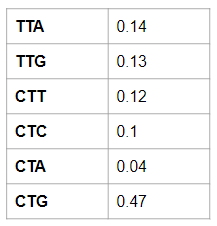